<a href="https://colab.research.google.com/github/PrabishaPradeep/DSA_Internship/blob/main/internship_week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis and Loyalty Prediction

---



**Problem Statement :** analyze customer purchase behavior, satisfaction, and loyalty scores,using the data given and develop a predictive model that predicts customer satisfaction or loyalty based on user inputs.

**Dataset description**



*   **Age**: Age of the customer

*   **Items Purchased**: Number of items purchased in a single transaction

*   **Total Spent**: Total amount spent on the transaction

*   **Discount (%)**: Percentage discount on the purchase

*   **Satisfaction Score**: Self-reported customer satisfaction score

*   **Warranty Extension**: Whether the customer opted for warranty extension

*   **Gender**: Gender of the customer

*   **Region**: Customer's region

*   **Product Category**: Category of the purchased product

*   **Payment Method**: Payment method used (e.g., UPI, Cash)

*   **Revenue**: Total revenue from the customer

*   **Store Rating**: Rating given by the customer to the store

*   **Loyalty Score**: Customer's loyalty score

*   **Membership Status**: Whether the customer is a member

*   **Preferred Visit Time**: Preferred time of visit

**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


**Read the dataset into python environment**

In [2]:
df=pd.read_csv(r"/content/customer_data.csv")
pd.set_option('display.max_columns',None)
df.head(5).round(2)

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.23,47.08,1.00,1,Male,South,Accessories,UPI,149.25,3.66,3.60,1.0,Evening
1,69,10,420.14,7.99,3.76,1,Female,South,Accessories,Cash,1485.52,3.55,25.76,1.0,Evening
2,46,4,127.74,37.23,1.77,1,Male,East,Laptop,Credit Card,85.55,3.92,7.02,1.0,Morning
3,32,9,417.72,8.23,1.93,0,Female,East,Tablet,UPI,824.12,3.86,7.64,1.0,Afternoon
4,60,13,608.03,5.00,3.90,0,Female,South,Tablet,UPI,2463.59,3.81,29.46,0.0,Morning


**Check basic information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [4]:
df.shape

(5000, 15)

Dataset has 15 features with 5000 entries. Among that, 10 features are numerical (7 float and 3 integer) and 5 are categorical features.

**Check for unique values**

In [5]:
(df.nunique()).sort_values(ascending=False)

,0
Total Spent,5000
Revenue,5000
Store Rating,4997
Loyalty Score,4962
Discount (%),4417
Satisfaction Score,2787
Age,52
Items Purchased,14
Product Category,5
Payment Method,5


Features ***'Warranty Extension'*** and ***'Membership Status' ***have  2 unique values out of 5000 entries which are 0 and 1.it is a binary variable, we can treat it as a categorical variable.

**Check for duplicates**

In [6]:
df.duplicated().sum()

0

***There are no duplicate entries in the dataset.***

## Exploratory data analysis

**Summary statistics of numerical features**

In [7]:
categorical = ['Gender', 'Region', 'Product Category', 'Payment Method','Warranty Extension', 'Membership Status', 'Preferred Visit Time']
numerical = ['Age', 'Items Purchased', 'Total Spent', 'Discount (%)','Satisfaction Score','Revenue', 'Store Rating','Loyalty Score']

In [8]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,43.58,14.92,18.00,31.00,43.00,56.00,69.00
Items Purchased,5000.0,7.54,4.01,1.00,4.00,7.00,11.00,14.00
Total Spent,5000.0,243.72,154.95,15.11,119.13,221.51,346.17,699.61
Discount (%),5000.0,26.62,13.59,5.00,15.38,27.85,38.09,48.49
Satisfaction Score,5000.0,2.65,1.53,1.00,1.00,2.34,4.13,5.00
Warranty Extension,5000.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
Revenue,5000.0,718.00,776.79,-201.43,164.70,380.55,1047.43,3523.47
Store Rating,4997.0,3.98,0.25,3.08,3.80,3.97,4.15,4.76
Loyalty Score,5000.0,15.64,9.14,0.00,7.94,13.97,23.52,39.24
Membership Status,4994.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00




*   The age of customers ranges from 18 to 69. the mean (43.58) slightly closer the median (43), indicating the distribution is approximately symmetric.
*   The average no of items purchased per single transaction is around 7. 75% of the customers likes to purchase below 11 number of items in a single transaction whereas only 25% customers buys above 11 items in a single transaction.
*   The satisfaction score ranges from 1 to 5 with an average score of around 2.65.indicating a somewhat average  level of customer satisfaction.
*   majority of the customers did not opt for a warranty extension, only 22% who did.
*   The negative revenue suggests there may be refunds, returns.
*   most of the store ratings are around 4.
*   The loyalty score ranges from 0 to 39.24 with an average score of around 15.64.
*   31% of the customers are members, while the 69% are not.





**Distribution of numerical features**

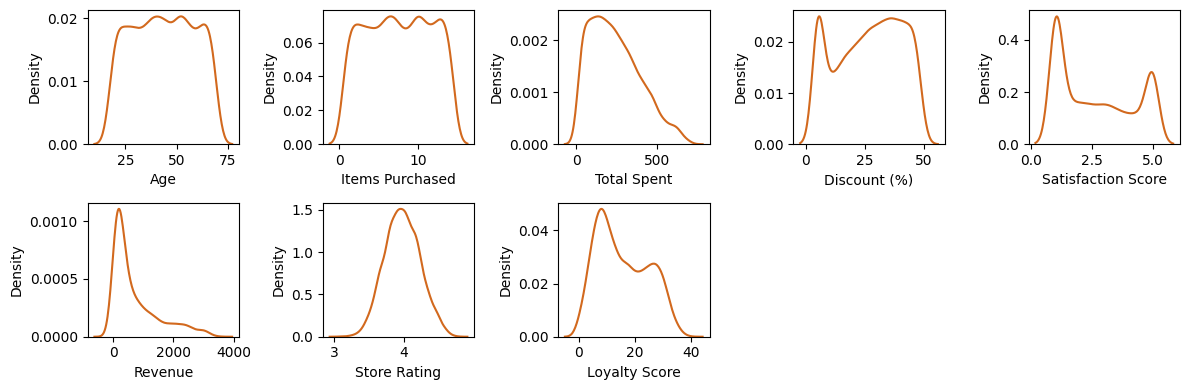

In [9]:
plt.figure(figsize=(12,4))
for i in range(0, len(numerical)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[numerical[i]], color='chocolate')
    plt.tight_layout()

**Distribution of categorical features**

<ipython-input-10-79185b13545e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-10-79185b13545e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-10-79185b13545e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-10-79185b13545e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


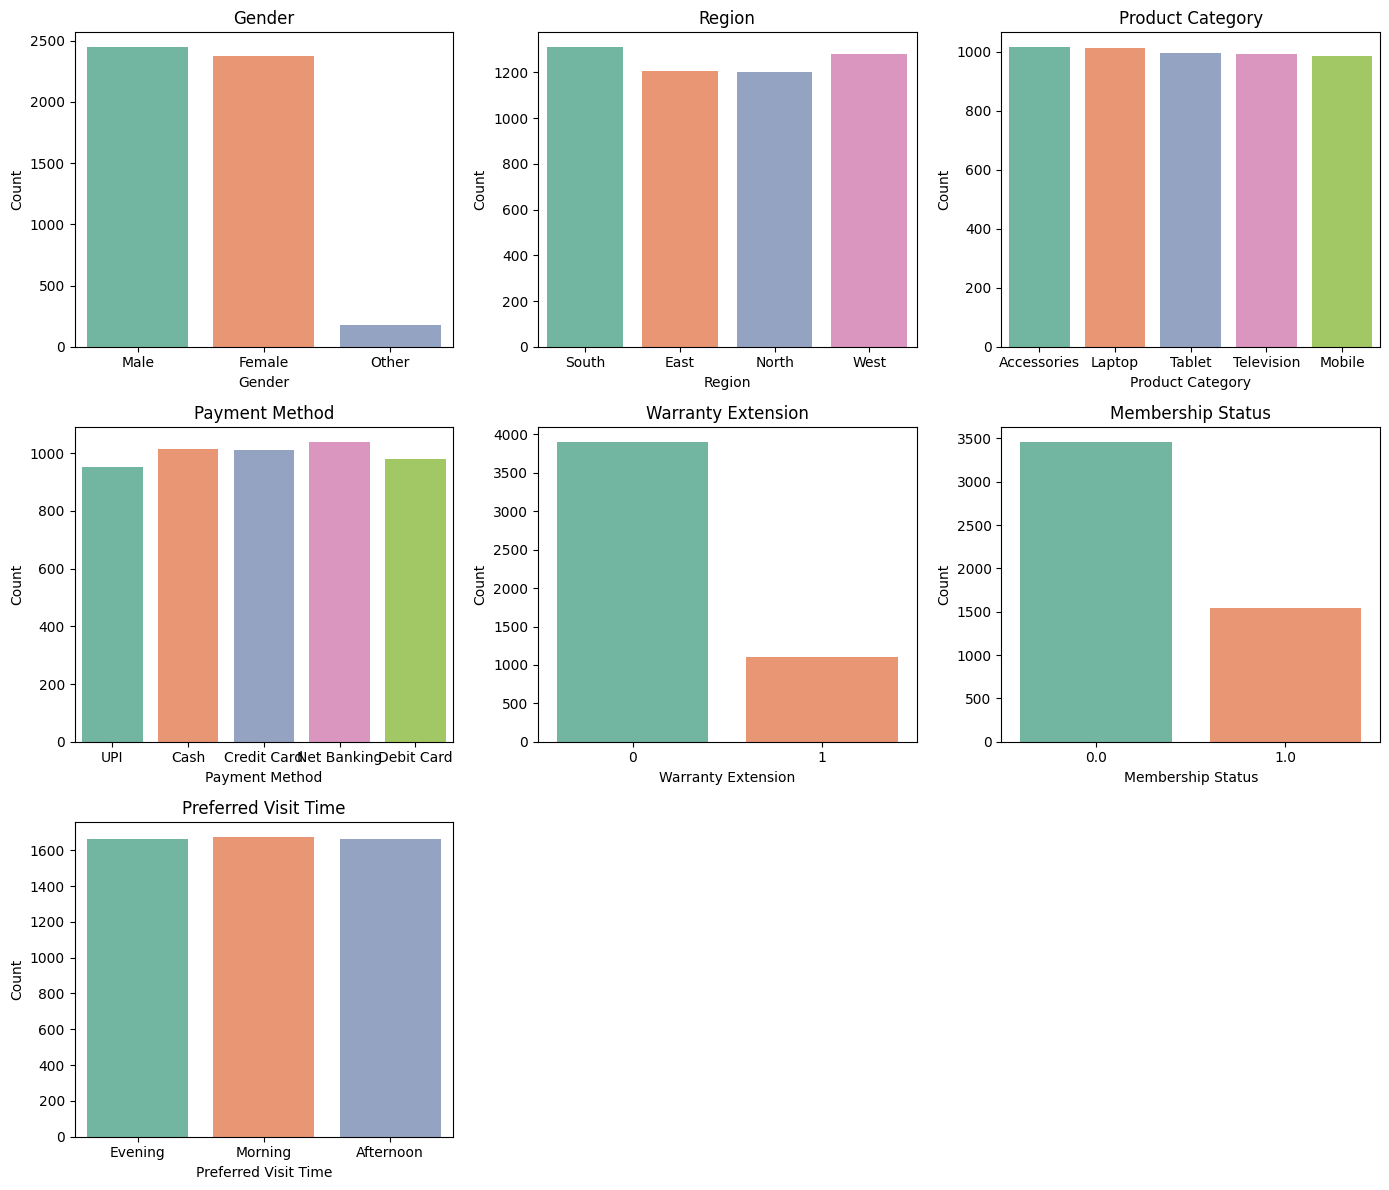

In [10]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


* the count of customers vary very lightly across region.
* comparatatively frequent payment methods are Net Banking  
* Most customers did not opt for a warranty extension or have any membership
* evening, Morning, and Afternoon are almost equally preferred as visit times.

**Distribution of Loyalty Score**

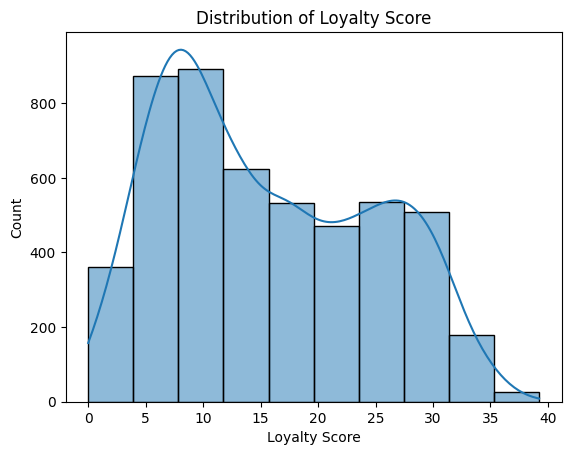

In [11]:
sns.histplot(df['Loyalty Score'], bins=10, kde=True)
plt.title('Distribution of Loyalty Score')
plt.show()

The graph shows a positively skewed distribution, with most of the customers have lower loyalty scores in th range 5-10 which is very low.only smaller group of customers have high loyalty scores.

**Distribution of Satisfaction Scores**

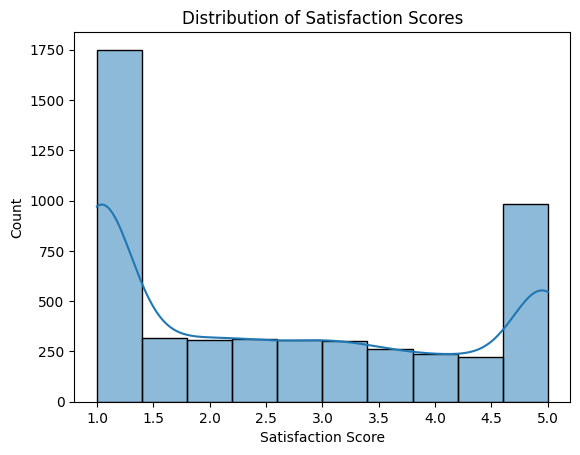

In [12]:
sns.histplot(df['Satisfaction Score'], bins=10, kde=True)
plt.title('Distribution of Satisfaction Scores')
plt.show()

The graph shows a bimodal distribution.most of the customers have given very low satisfaction score .

**Check for outliers**

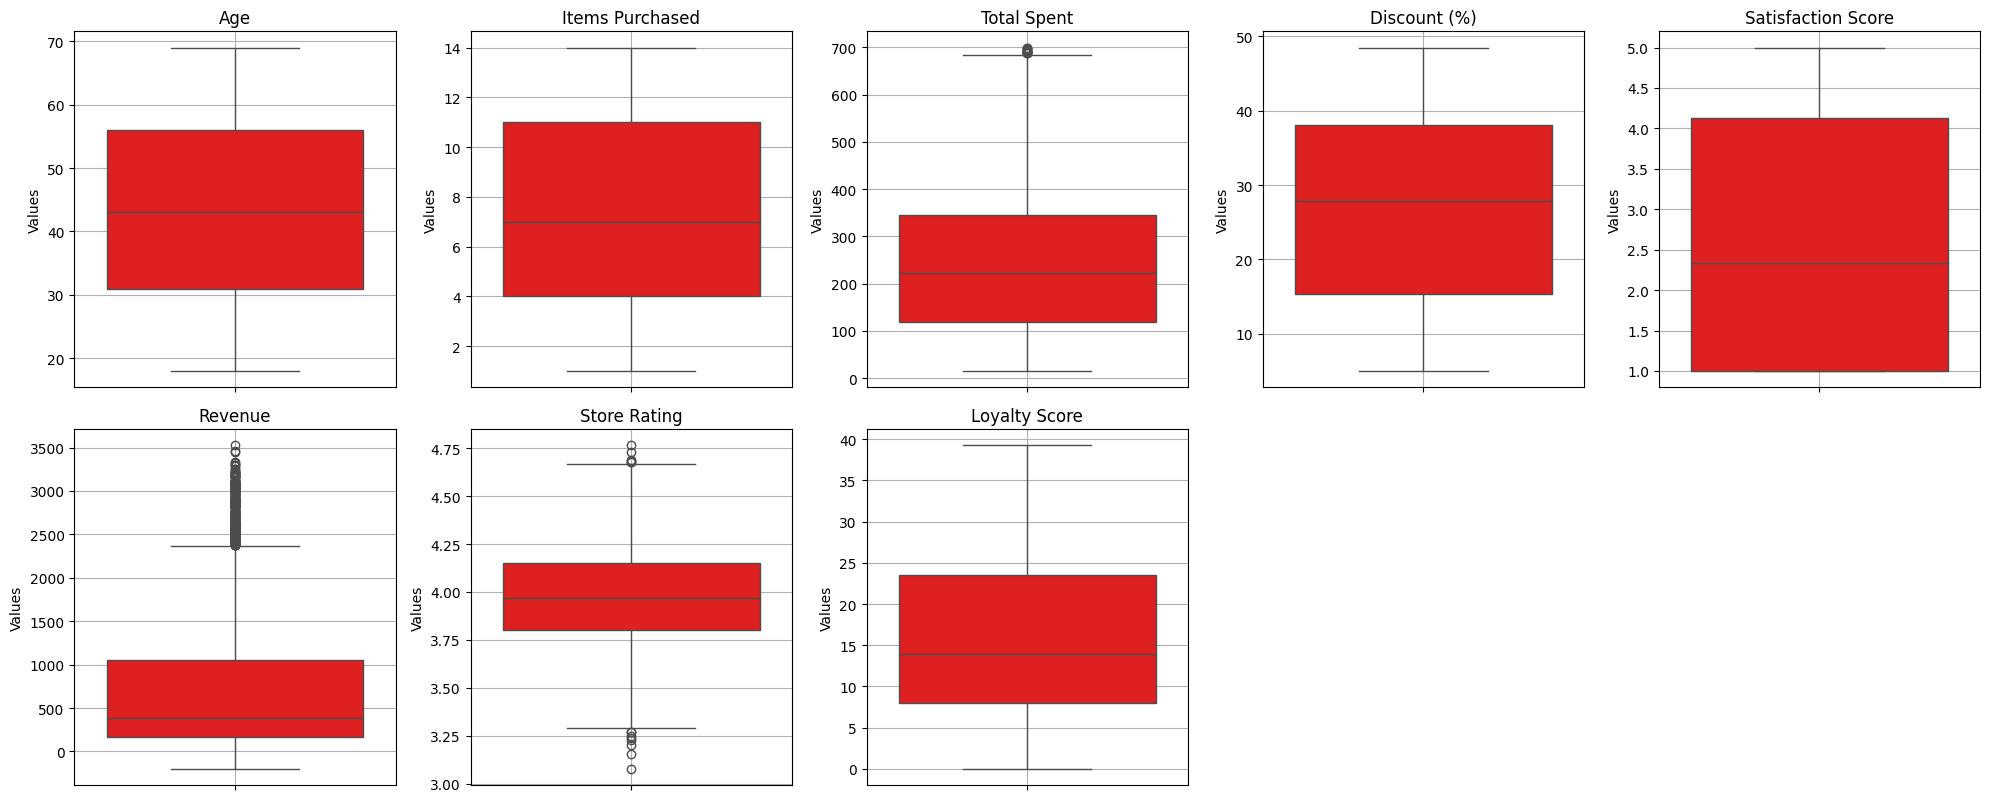

In [13]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(df[col],color='red')
    plt.title(f'{col}')
    plt.ylabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

these boxplots shows there are quite a lot of outliers in some of the variables.

**Multivariate data analysis**

**Correlation**

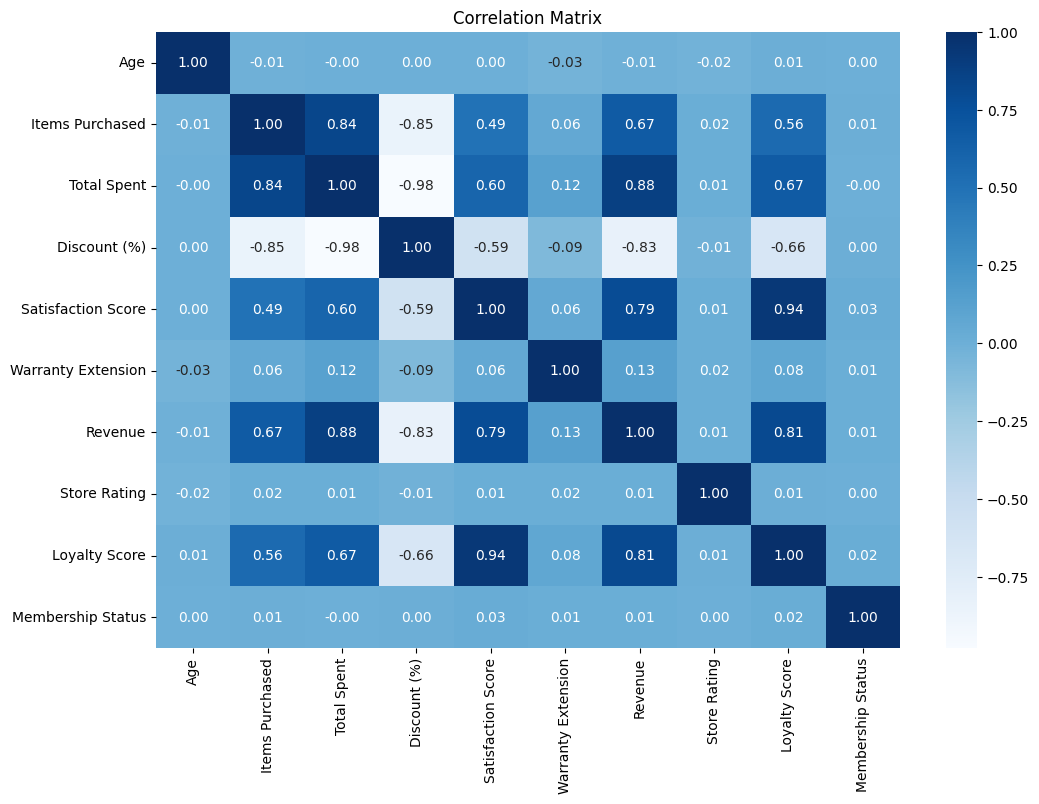

In [14]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
corr
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


*   Revenue & Total Spent have Strong positive correlation of 0.88, means customers with higher revenue genrally spend more .
*   Satisfaction Score & Loyalty Score have Very strong positive correlation of 0.94, indicates that customers with higher satisfaction score are very much loyal to the store.
*   revenue and loyalty score have strong positive correlation 0.81



   



**Impact of item purchased and total spent on satisfaction score**

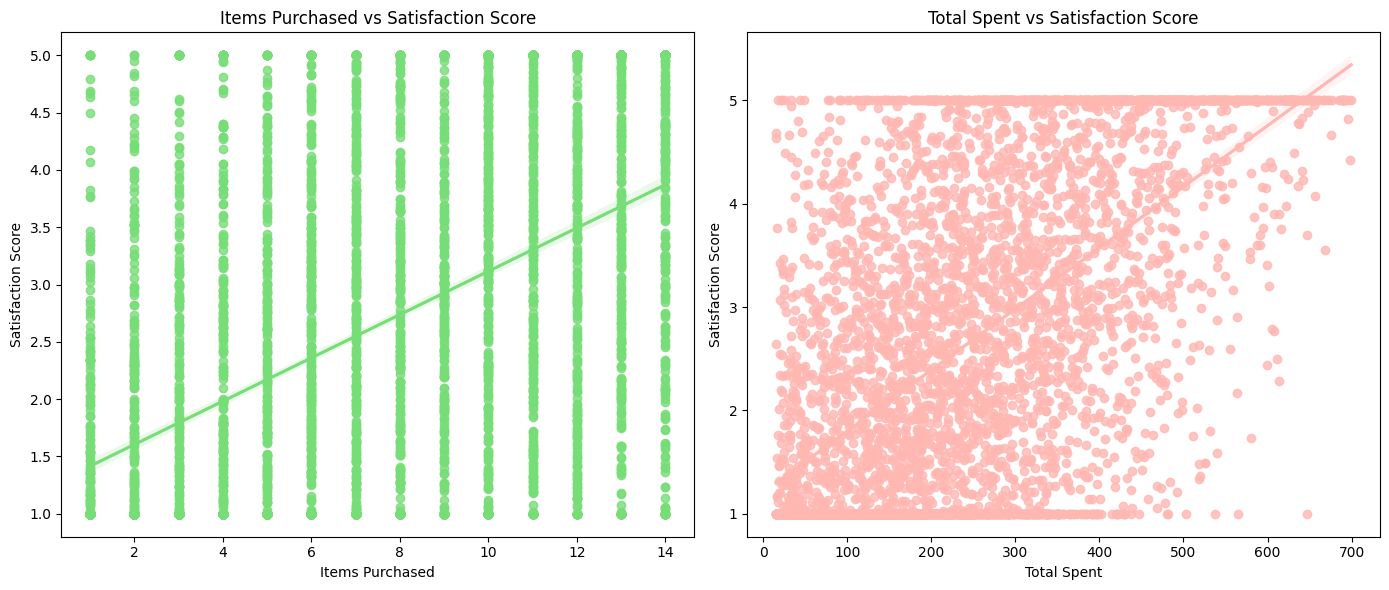

In [15]:
colors = ['#77DD77', '#FFB7B2']

plt.figure(figsize=(14, 6))
for idx, (i, color) in enumerate(zip(['Items Purchased', 'Total Spent'], colors), start=1):
    plt.subplot(1, 2, idx)
    sns.regplot(x=i, y='Satisfaction Score', data=df, color=color)
    plt.title(f'{i} vs Satisfaction Score')
    plt.xlabel(i)
    plt.ylabel('Satisfaction Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

both the plots show a positive trend.as the item purchased and total spent increases satisfaction score also increases.it shows that if the customer is satisfied they will spent more and buy more .

**Impact of item purchased and total spent on loyalty score**

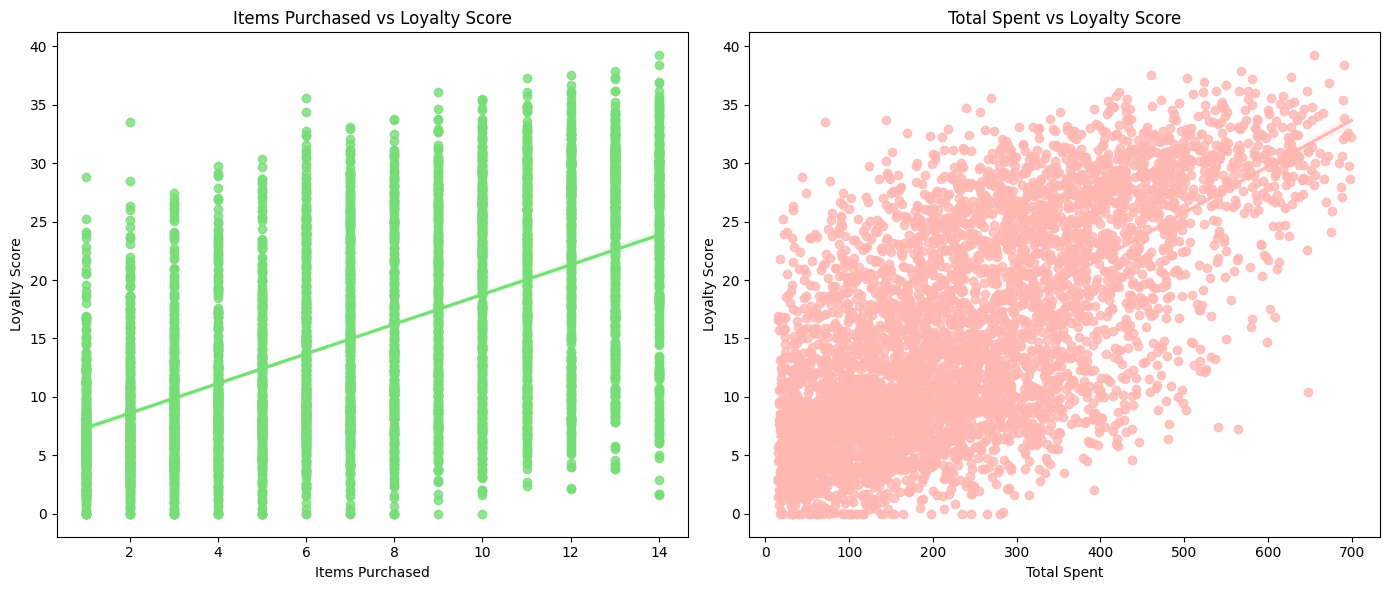

In [16]:
colors = ['#77DD77', '#FFB7B2']

plt.figure(figsize=(14, 6))
for idx, (i, color) in enumerate(zip(['Items Purchased', 'Total Spent'], colors), start=1):
    plt.subplot(1, 2, idx)
    sns.regplot(x=i, y='Loyalty Score', data=df, color=color)
    plt.title(f'{i} vs Loyalty Score')
    plt.xlabel(i)
    plt.ylabel('Loyalty Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

both the plots show a positive trend. customers who buy more and spent more will usually have high loyalty score

**Segment customer data based on Region and Product Category**

In [17]:
region_analysis = df.groupby('Region').agg({'Satisfaction Score': 'mean', 'Loyalty Score': 'mean'})
print(region_analysis)
print('--------------------------------------------------------------------------------------------------------------')
product_analysis = df.groupby('Product Category').agg({'Satisfaction Score': 'mean', 'Loyalty Score': 'mean'})
print(product_analysis)

        Satisfaction Score  Loyalty Score
Region                                   
East              2.664952      15.726079
North             2.688928      15.910227
South             2.625350      15.462415
West              2.625032      15.480349
--------------------------------------------------------------------------------------------------------------
                  Satisfaction Score  Loyalty Score
Product Category                                   
Accessories                 2.667060      15.810278
Laptop                      2.599353      15.272068
Mobile                      2.617103      15.357037
Tablet                      2.657758      15.787878
Television                  2.709702      15.965189



*   North region has comparatively more satisfaction score (2.6889) and loyalty score (15.9102) South regions shows lowest satisfaction and loyalty scores.
*   Television shows the highest satisfaction (2.7097) and loyalty score (15.9652), indicating that customers are more satisfied with buying televisions and may be more loyal to the brand/product.
*   Laptop has the lowest satisfaction (2.5994) and loyalty (15.2721) scores, suggesting potential dissatisfaction in this category, which could impact customer loyalty.







# Data Pre - Processing

**Check for null values**

In [18]:
df.isnull().sum().sort_values(ascending=False)

,0
Preferred Visit Time,8
Membership Status,6
Payment Method,4
Store Rating,3
Gender,2
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0


Null values are present in  ***Preferred Visit Time*** (8) ,***Membership Status*** (6) ,***Store Rating*** (3) ,***Payment Method*** (4) and ***Gender*** (2).

**null value handling**

In [19]:
df = df.dropna()


In [20]:
# check null values again

df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


***All null values are imputed properly.***

**Encoding**

In [21]:
df.dtypes

,0
Age,int64
Items Purchased,int64
Total Spent,float64
Discount (%),float64
Satisfaction Score,float64
Warranty Extension,int64
Gender,object
Region,object
Product Category,object
Payment Method,object


In [22]:
df = pd.get_dummies(df, columns=['Gender','Region', 'Product Category', 'Payment Method', 'Preferred Visit Time']).astype(int)


In [23]:
df.dtypes

,0
Age,int64
Items Purchased,int64
Total Spent,int64
Discount (%),int64
Satisfaction Score,int64
Warranty Extension,int64
Revenue,int64
Store Rating,int64
Loyalty Score,int64
Membership Status,int64


All categorical features are converted to numerical features.

**Normalize numerical fields**

In [24]:
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

In [25]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,4978.0,0.00,1.00,-1.72,-0.84,-0.04,0.83,1.70
Items Purchased,4978.0,0.00,1.00,-1.63,-0.88,-0.13,0.86,1.61
Total Spent,4978.0,0.00,1.00,-1.47,-0.81,-0.14,0.66,2.94
Discount (%),4978.0,0.00,1.00,-1.57,-0.83,0.06,0.88,1.62
Satisfaction Score,4978.0,-0.00,1.00,-0.91,-0.91,-0.25,1.08,1.74
Warranty Extension,4978.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
Revenue,4978.0,0.00,1.00,-1.18,-0.71,-0.43,0.42,3.62
Store Rating,4978.0,-0.00,1.00,-0.91,-0.91,-0.91,1.10,1.10
Loyalty Score,4978.0,0.00,1.00,-1.65,-0.89,-0.23,0.86,2.61
Membership Status,4978.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
